<a href="https://colab.research.google.com/github/saurabhshinkar/CRP/blob/main/Cardiovascular_Risk_prediction_Saurabh_Shinkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardiovascular Risk Prediction**

### <b> Problem Description </b>
### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

## <b> Data Description </b>

### <b> The dataset provides the patients’ information. It includesover 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>

### <b>Demographic: </b>


• **Sex**: male or female("M" or "F")

•** Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history): </b>


• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

### <b>Medical(current): </b>


• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

### <b>Predict variable (desired target) </b>


• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing** **Libraries**

In [58]:
#Import all library that will be used in entire project

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Mount Drive And Import Data**

In [2]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Cardiovascular Risk prediction/'
data= pd.read_csv(File_path + 'data_cardiovascular_risk.csv')

In [4]:
# First Look 
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#tail of data
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#Discription of Data
data.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


# **Handling Missing Vaules**

In [8]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [9]:
#data of null glucose values
data[data['glucose'].isnull()].head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


Text(0.5, 1.0, 'Distribution Plot Of glucose')

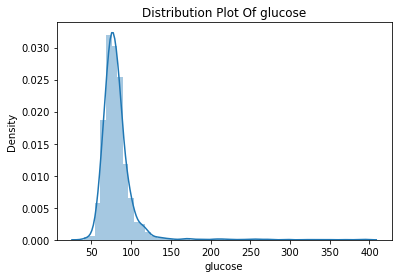

In [10]:
#Distribution Plot Of glucose
sns.distplot(data.glucose.dropna())
plt.title('Distribution Plot Of glucose')

In [11]:
#median of glucose
data.glucose.median()

78.0

In [12]:
#Fill NaN Values in glucose Column with Median
data['glucose'] =data['glucose'].fillna(data['glucose'].median())

Text(0.5, 1.0, 'Distribution Plot Of education')

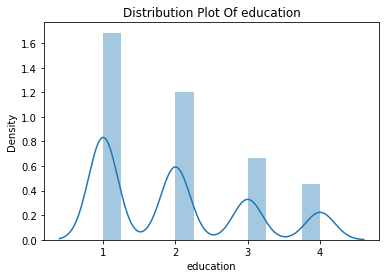

In [13]:
#Distribution Plot Of education
sns.distplot(data.education.dropna())
plt.title('Distribution Plot Of education')

In [14]:
#Fill NaN Values in glucose Column with Median
data['education'] =data['education'].fillna(data['education'].median())

In [15]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
BPMeds        44
totChol       38
cigsPerDay    22
BMI           14
heartRate      1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [16]:
#Dropping null as they are now negligible 
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3272 non-null   int64  
 1   age              3272 non-null   int64  
 2   education        3272 non-null   float64
 3   sex              3272 non-null   object 
 4   is_smoking       3272 non-null   object 
 5   cigsPerDay       3272 non-null   float64
 6   BPMeds           3272 non-null   float64
 7   prevalentStroke  3272 non-null   int64  
 8   prevalentHyp     3272 non-null   int64  
 9   diabetes         3272 non-null   int64  
 10  totChol          3272 non-null   float64
 11  sysBP            3272 non-null   float64
 12  diaBP            3272 non-null   float64
 13  BMI              3272 non-null   float64
 14  heartRate        3272 non-null   float64
 15  glucose          3272 non-null   float64
 16  TenYearCHD       3272 non-null   int64  
dtypes: float64(9),

In [18]:
#Numerical features
numerical=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

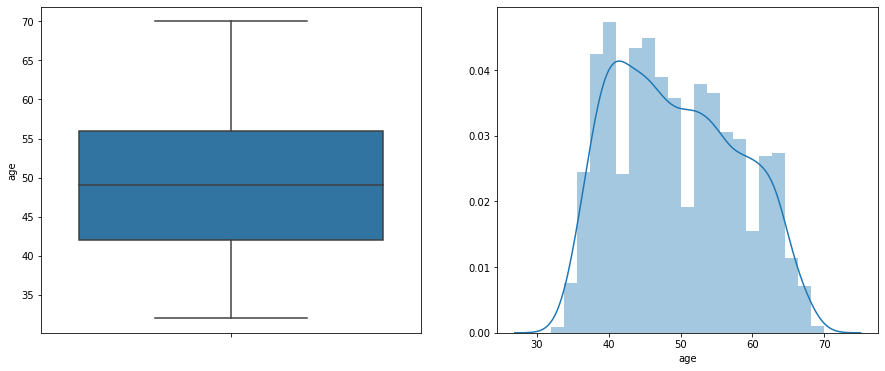

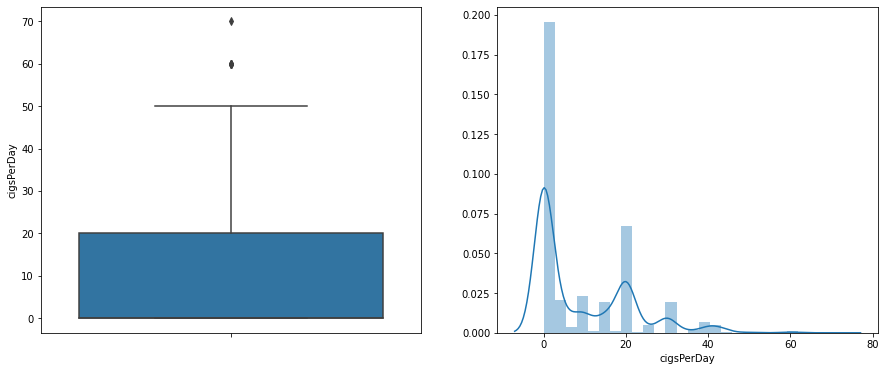

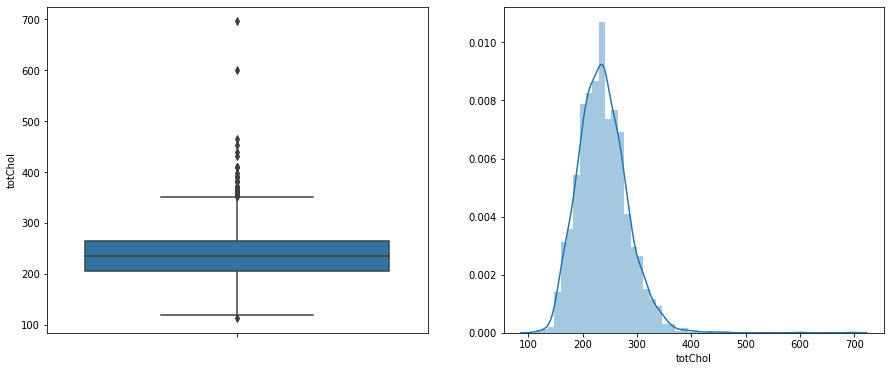

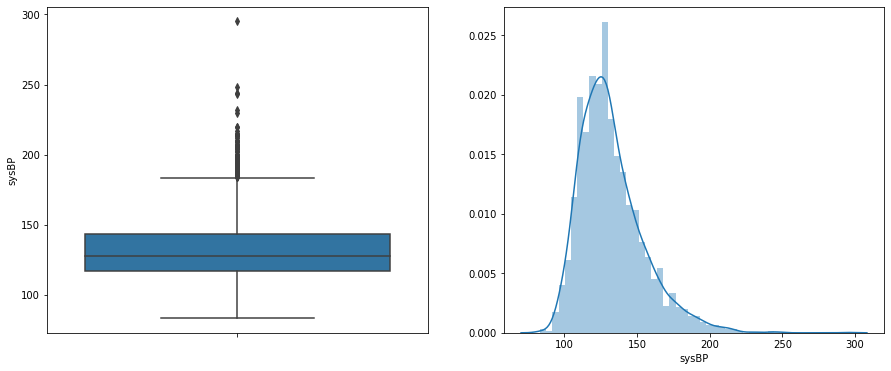

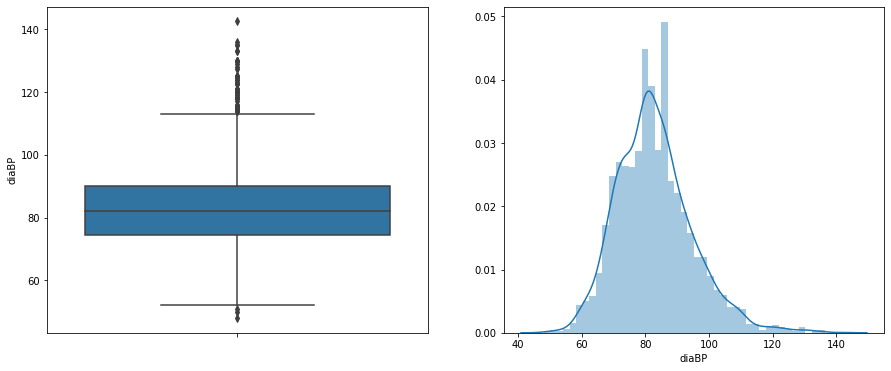

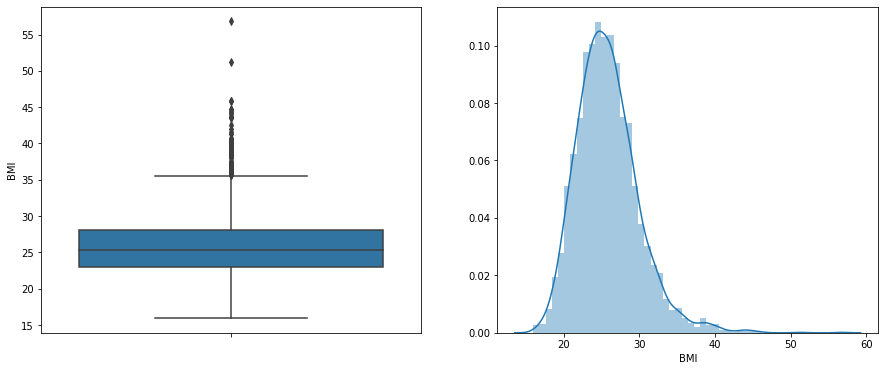

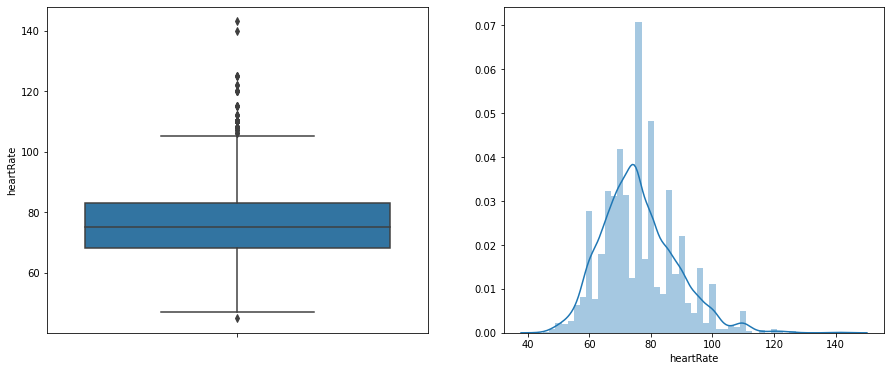

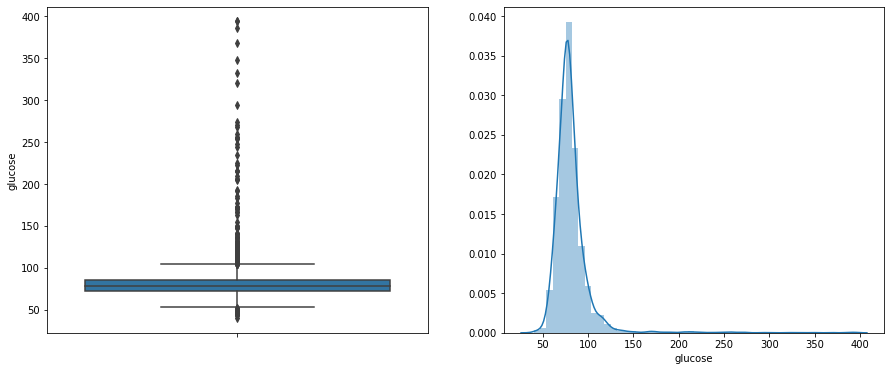

In [19]:
#Boxplot and distribution plot of numerical features
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

**We can see outliers are present in our data but We are not them as we have less data**

smote remained to used and also converting features into categorical and combining related feature is remained

# EDA

## **Univariate Analysis**

***Barplot Of Age Distribution***

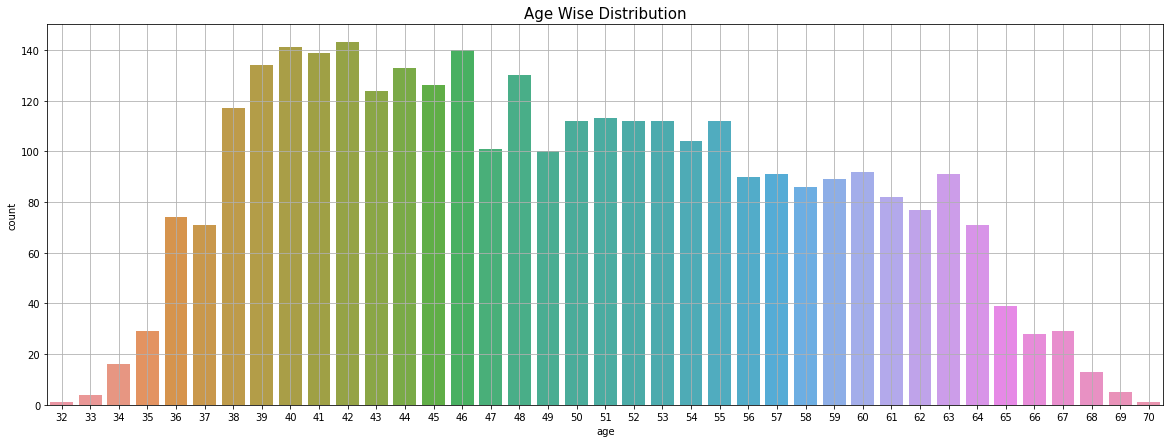

In [20]:
#barplot of age and its counts 
plt.figure(figsize=(20,7))
sns.countplot(x = data['age'])
plt.title('Age Wise Distribution',fontsize=15)
plt.grid()
plt.show()

***Barplot Of Education Distribution***

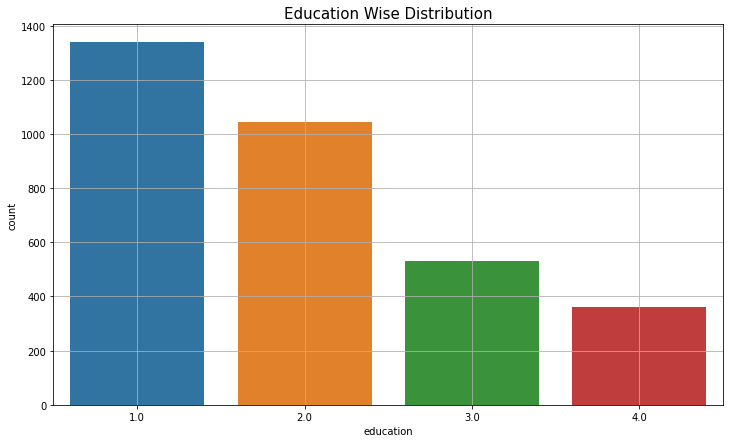

In [21]:
#barplot of education and its counts 
plt.figure(figsize=(12,7))
sns.countplot(x = data['education'])
plt.title('Education Wise Distribution',fontsize=15)
plt.grid()
plt.show()

***Pieplot of Male And Female %***

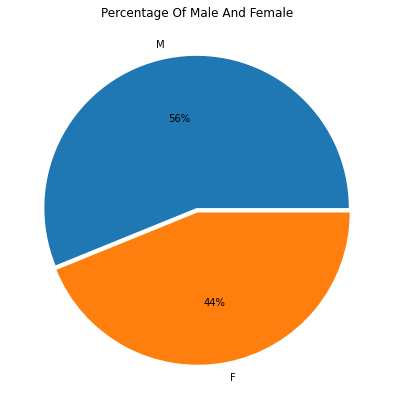

In [22]:
#Percentage Count Of Male And female
plt.figure(figsize=(10,7))
plt.pie(data['sex'].value_counts(),labels=['M','F'],autopct='%.0f%%',explode=[0.03,0])
plt.title('Percentage Of Male And Female')
plt.show()

***Barh Plot Of is_smoking Value Counts***

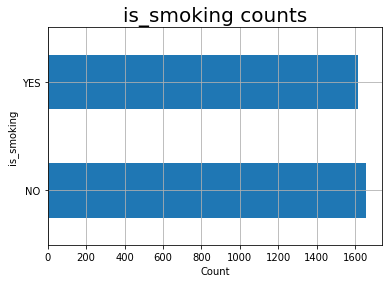

In [23]:
#Categories of Top 50 Install Apps
data['is_smoking'].value_counts().plot(kind="barh")
plt.title("is_smoking counts",fontsize=20)
plt.ylabel("is_smoking")
plt.xlabel("Count")
plt.grid()

***Distribution plot of numerical features***

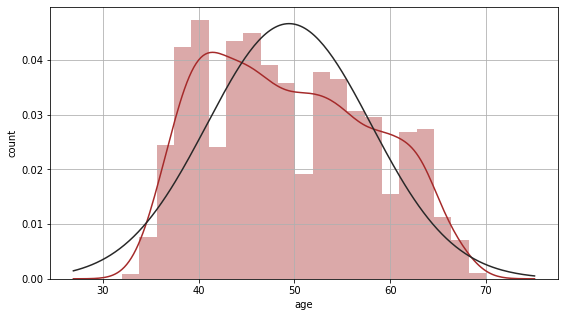

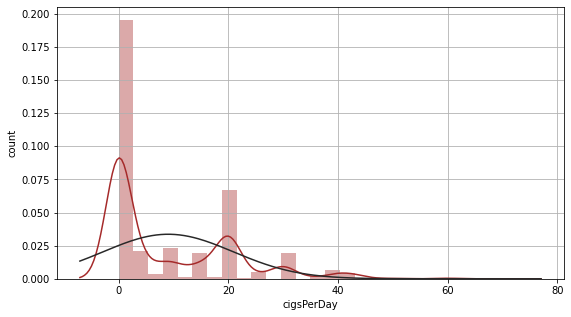

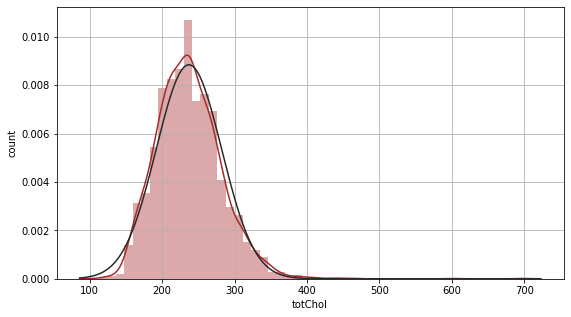

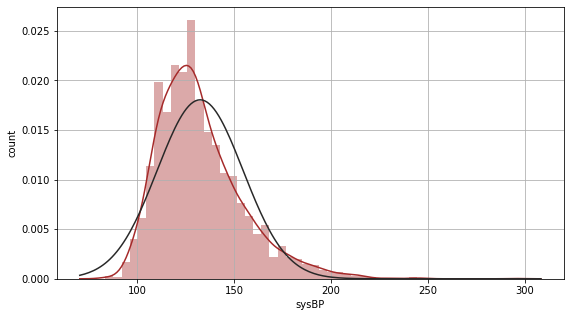

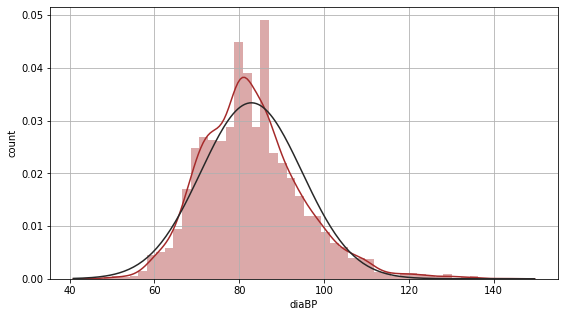

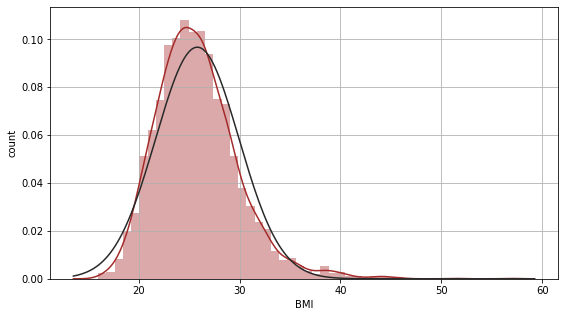

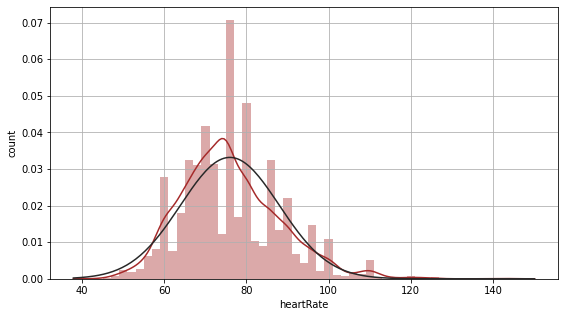

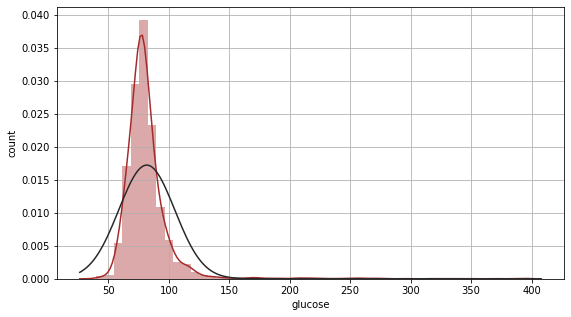

In [24]:
#Distribution plot of numerical features
for var in numerical:
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna(),color="brown",fit=norm)
    plt.grid()
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

## **Bivariate Analysis**

***Count Plot Of Age And Ten Year CHD***

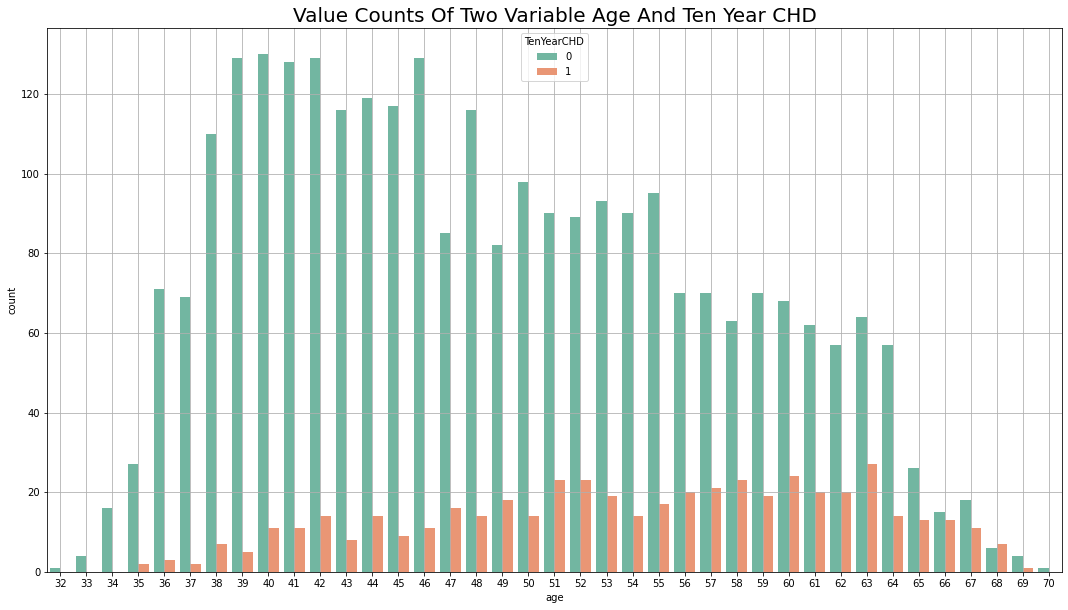

In [25]:
#Value Counts Of Two Variable Age And Ten Year CHD
plt.rcParams['figure.figsize'] = (40,10)
plt.subplot(1, 2, 2)
fig = sns.countplot(x=data['age'],hue=data['TenYearCHD'],palette="Set2")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_ylabel('count')
fig.set_xlabel('age')
plt.title("Value Counts Of Two Variable Age And Ten Year CHD",fontsize=20)

plt.show()

***Count Plot Of Sex And Ten Year CHD***

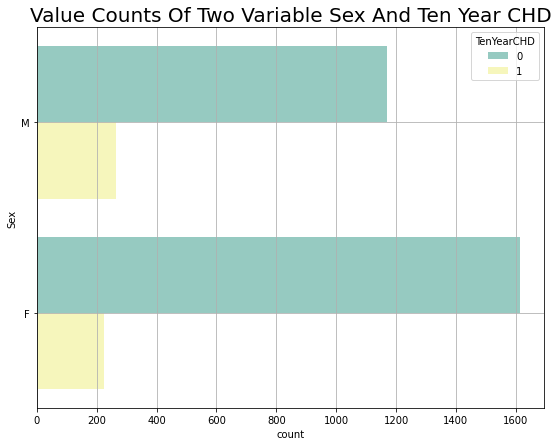

In [26]:
#Value Counts Of Two Variable Sex And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(y=data['sex'],hue=data['TenYearCHD'],palette="Set3")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_xlabel('count')
fig.set_ylabel('Sex')
plt.title("Value Counts Of Two Variable Sex And Ten Year CHD",fontsize=20)

plt.show()

***Count Plot Of is_smoking And Ten Year CHD***

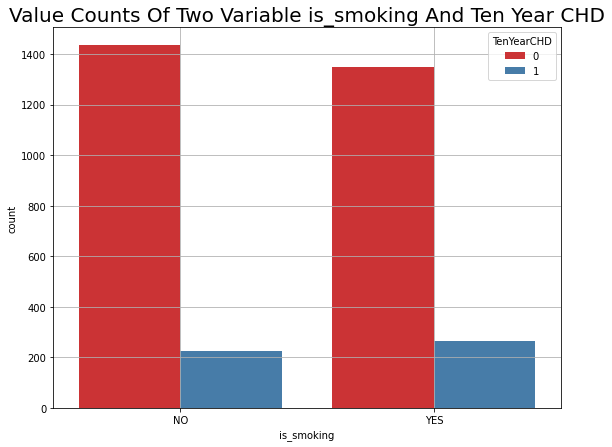

In [27]:
#Value Counts Of Two Variable is_smoking And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(x=data['is_smoking'],hue=data['TenYearCHD'],palette="Set1")
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_ylabel('count')
fig.set_xlabel('is_smoking')
plt.title("Value Counts Of Two Variable is_smoking And Ten Year CHD",fontsize=20)

plt.show()

***Count Plot Of prevalentHyp And Ten Year CHD***

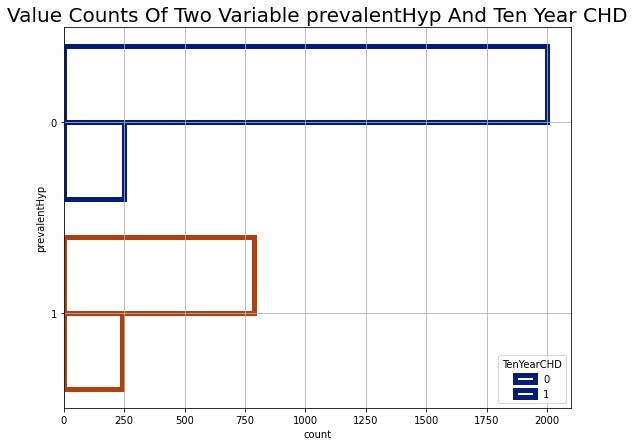

In [28]:
#Value Counts Of Two Variable prevalentHyp And Ten Year CHD
plt.rcParams['figure.figsize'] = (20,7)
plt.subplot(1, 2, 2)
fig = sns.countplot(y=data['prevalentHyp'],hue=data['TenYearCHD'],facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
#plt.xticks(rotation=90, horizontalalignment="center")
plt.grid()
fig.set_xlabel('count')
fig.set_ylabel('prevalentHyp')
plt.title("Value Counts Of Two Variable prevalentHyp And Ten Year CHD",fontsize=20)

plt.show()

##**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

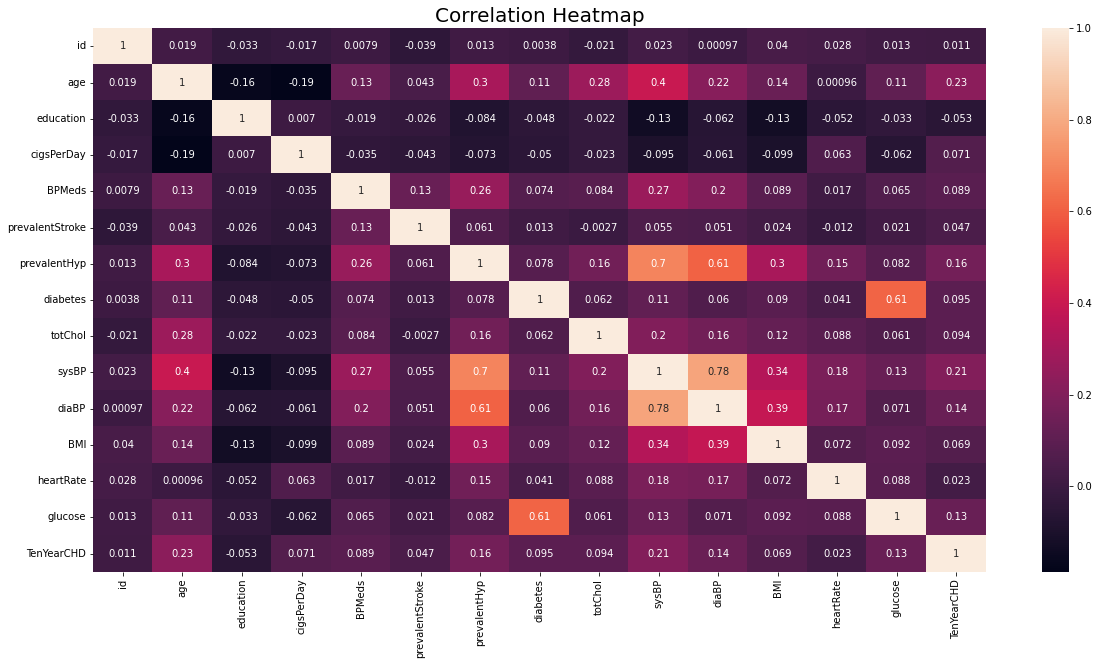

In [29]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

There is 78% positive correlation in sysBP and diaBP 

**The top number is the maximum pressure the heart exerts while beating (systolic pressure). The bottom number is the amount of pressure in the arteries between beats (diastolic pressure).**

so we will drop column diaBP

In [32]:
#drop column diaBP
data.drop(columns=['diaBP'],axis=1,inplace=True)

cigsPerday have detailed information about smokers and non smokers so we can drop is_smoking column

In [34]:
#drop column diaBP
data.drop(columns=['is_smoking'],axis=1,inplace=True)

Converting categorical variable Sex in to dummy variable

In [38]:
#dummy variable from sex column
data= pd.get_dummies(data, columns=['sex'])

In [42]:
#drop column id as it is of no use
data.drop(columns=['id'],axis=1,inplace=True)

In [43]:
data.head(2)

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,29.77,72.0,75.0,0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,20.35,88.0,94.0,0,1,0


In [44]:
#dependant variable
Y=data['TenYearCHD']

#independant variable
df=data.copy()
df.drop(columns=['TenYearCHD'],axis=1,inplace=True)
X=df

In [46]:
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,sex_F,sex_M
1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,29.77,72.0,75.0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,20.35,88.0,94.0,1,0
3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,28.26,68.0,94.0,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,26.42,70.0,77.0,1,0
5,61,3.0,0.0,0.0,0,1,0,272.0,182.0,32.80,85.0,65.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0.0,0.0,0,1,0,217.0,182.0,26.98,105.0,113.0,1,0
3385,60,1.0,0.0,0.0,0,0,0,261.0,123.5,29.28,70.0,103.0,1,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,102.0,21.96,80.0,84.0,1,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,164.0,28.92,73.0,72.0,0,1


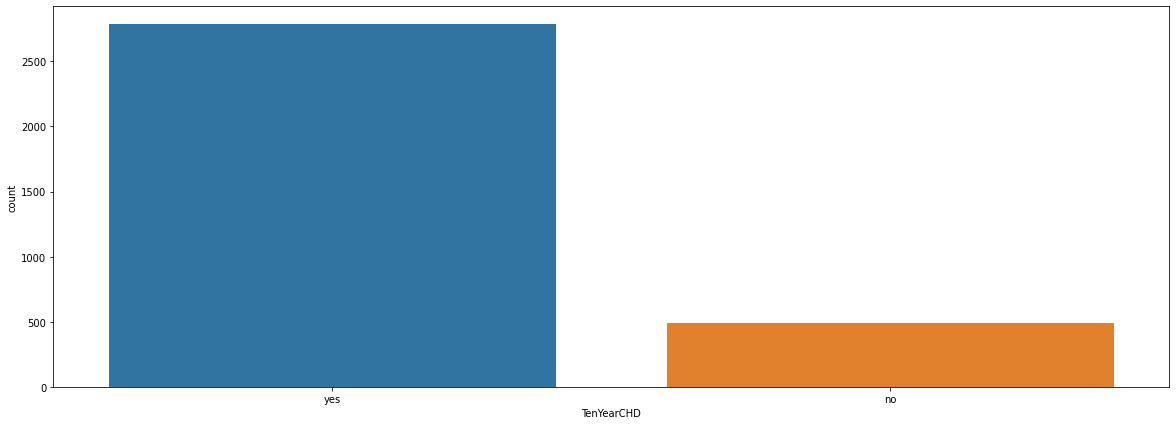

In [47]:
# visualize the target variable
g = sns.countplot(data['TenYearCHD'])
g.set_xticklabels(['yes','no'])
plt.show()

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3272
Resampled dataset shape 5568


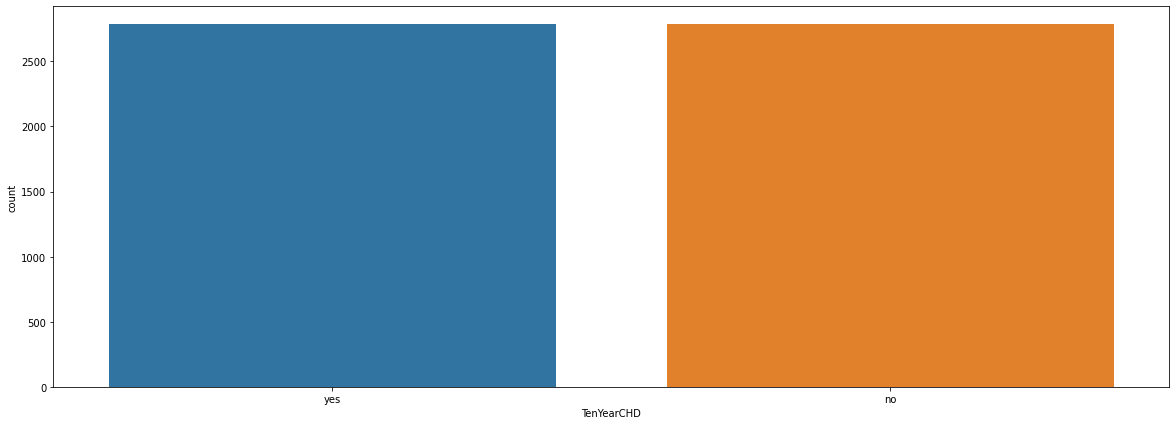

In [52]:
# visualize the target variable
g = sns.countplot(y_smote)
g.set_xticklabels(['yes','no'])
plt.show()

In [61]:
#StandardScaler- Standardize features by removing the mean and scaling to unit variance.
# Transforming data
scaler = StandardScaler()
X_smote = scaler.fit_transform(x_smote)

In [62]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 10)

In [65]:
from sklearn.linear_model import LogisticRegression
# Instantiation
logistic= LogisticRegression()
# Fitting the model
logistic.fit(X_smote, y_smote)



LogisticRegression()

In [66]:
# Predicting the results
y_pred_train =logistic.predict(X_train)
y_pred_test =logistic.predict(X_test)

In [67]:
logistic.score(y_test,y_pred_test)

ValueError: ignored

In [ ]:
r2_score_xgb_r_train= r2_score(y_train, y_pred_train)

In [63]:
from sklearn.linear_model import LogisticRegression
# Fitting model
lr_model = LogisticRegression()
# training the model
lr_model.fit(X_smote_scaled, y_smote)
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

In [ ]:
model.score(X_test, y_test)